In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shravankumar9892/image-colorization")

print("Path to dataset files:", path)

100%|██████████| 2.10G/2.10G [00:35<00:00, 62.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shravankumar9892/image-colorization/versions/4


In [2]:
import os

# path 변수에 저장된 디렉토리 내 파일 목록 출력
print("Dataset contents:")
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


Dataset contents:
/root/.cache/kagglehub/datasets/shravankumar9892/image-colorization/versions/4/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
/root/.cache/kagglehub/datasets/shravankumar9892/image-colorization/versions/4/l/gray_scale.npy
/root/.cache/kagglehub/datasets/shravankumar9892/image-colorization/versions/4/ab/ab/ab2.npy
/root/.cache/kagglehub/datasets/shravankumar9892/image-colorization/versions/4/ab/ab/ab3.npy
/root/.cache/kagglehub/datasets/shravankumar9892/image-colorization/versions/4/ab/ab/ab1.npy


In [3]:
import numpy as np

# npy 파일 열기
gray_scale_path = f"{path}/l/gray_scale.npy"
ab1_path = f"{path}/ab/ab/ab1.npy"
# ab2_path = f"{path}/ab/ab/ab2.npy"
# ab3_path = f"{path}/ab/ab/ab3.npy"

# 데이터를 로드
gray_scale = (np.load(gray_scale_path))[:100]
ab1 = (np.load(ab1_path))[:100]
# ab2 = np.load(ab2_path)
# ab3 = np.load(ab3_path)

# 데이터 확인
print("Gray Scale Shape:", gray_scale.shape) # (h, w) 형식
print("AB1 Shape:", ab1.shape) # (h, w, 2) 형식

# print(ab1.shape, ab2.shape, ab3.shape)

Gray Scale Shape: (100, 224, 224)
AB1 Shape: (100, 224, 224, 2)


In [4]:
print("AB1 min:", ab1.min(), "max:", ab1.max())

AB1 min: 20 max: 221


In [5]:
# [0, 1]로 정규화
ab1_normalized = (ab1 - 20)/201
# [-128, 127]로 정규화
ab1_normalized = ab1_normalized * 255 -128

In [6]:
ab1_normalized.min(), ab1_normalized.max()

(-128.0, 127.0)

In [7]:
gray_scale.min(), gray_scale.max()

(0, 255)

In [8]:
# 정규화
gray_normalized = gray_scale - 128.

gray_normalized.min(), gray_normalized.max()

(-128.0, 127.0)

In [9]:
# ab_combined = np.concatenate([ab1_normalized, ab2_normalized, ab3_normalized], axis=0)
# print(ab_combined.min(), ab_combined.max())

In [10]:
# ab_combined.shape

In [11]:
# 첫 5개 데이터 미리보기
gray_scale[:2]

array([[[237, 135,  75, ...,  35,  37,  63],
        [234, 152,  72, ...,  41,  49,  47],
        [215, 216, 104, ...,  73,  48,  82],
        ...,
        [ 40,  45,  38, ...,  11,   8,   8],
        [ 40,  56,  47, ...,   8,   7,  10],
        [ 42,  60,  79, ...,  12,  13,  15]],

       [[202, 204, 207, ..., 133, 136, 138],
        [199, 199, 200, ..., 123, 128, 134],
        [196, 159, 153, ..., 110,  76, 131],
        ...,
        [222, 200, 194, ...,  98, 108, 166],
        [224, 224, 224, ..., 165, 166, 165],
        [224, 227, 227, ..., 170, 168, 167]]], dtype=uint8)

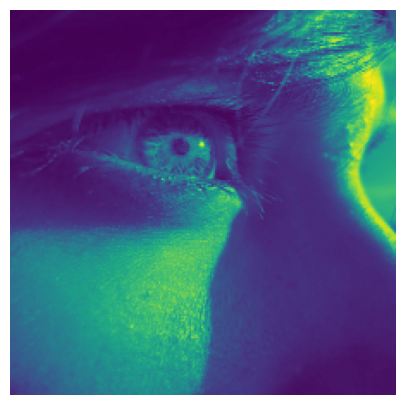

In [12]:
# 이미지를 선택
gray_image = gray_scale[50]  # 흑백 채널 (H, W)
# 이미지 출력
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(gray_image)
plt.axis("off")
plt.show()

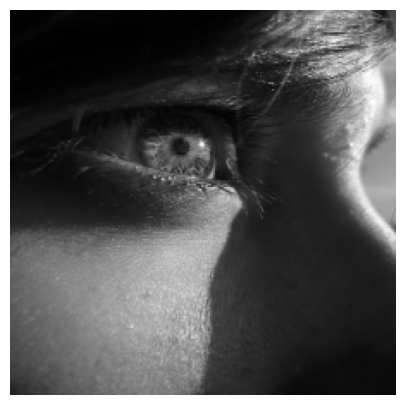

In [13]:
plt.figure(figsize=(10, 5))
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.show()

### **컬러 이미지를 제대로 시각화하는 방법**

#### **lab2rgb** 사용
- 사용하고자 하는 데이터는 Lab 색 공간에서 작업.
- 흑백(L 채널) 데이터와 색상 정보(AB 채널)을 조합하여 최종 컬러 이미지를 복원하려는 포르젝트로서.
- Lab 색 공간
  - L 채널: 밝기 정보를 담고 있음 → 흑백 이미지와 유사
  - A 채널: 녹색-적색 축의 색상 정보
  - B 채널: 파란색-노란색 축의 색상 정보
- RGB 변환 이유
  - `gray_scale.npy`는 L 채널을 담고 있음.
  - `ab*.npy`는 A와 B 채널을 담고 있음.
  - 이를 조합하여 색상 정보를 포함하는 컬러 이미지를 생성하려면, Lab 색 공간에서 RGB 색 공간으로 변환해야 한다.

#### Lab → RGB 변환
1. `skimage.color.lab2rgb()`
2. OpenCV의 `cv2.cvtColor()`

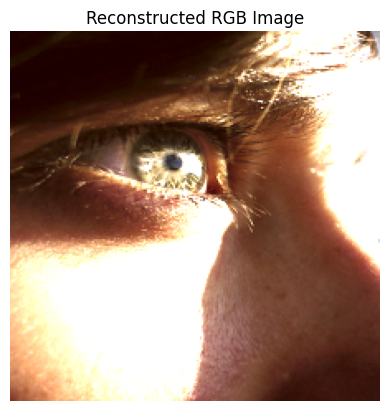

In [14]:
from skimage.color import lab2rgb

# L, AB 채널 데이터 (예시)
L = gray_scale[50]  # (224, 224), 흑백 밝기 정보
AB = ab1_normalized[50]  # (224, 224, 2), A와 B 채널

# Lab 배열 조합
Lab = np.zeros((L.shape[0], L.shape[1], 3))  # (224, 224, 3)
Lab[:, :, 0] = L  # L 채널
Lab[:, :, 1:] = AB  # A와 B 채널

# Lab → RGB 변환
rgb_image = lab2rgb(Lab)

# RGB 이미지 시각화
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Reconstructed RGB Image")
plt.show()

In [15]:
# cvtColor에 넣을 gray_normalized와 ab1_normalized 데이터를 조합한 Lab 이미지 생성
import numpy as np
import cv2

# LAB 데이터를 결합하여 컬러 이미지 생성
original_color_images = []

for i in range(len(gray_normalized)):
    # L 채널 (흑백 이미지)
    L = gray_normalized[i]  # (h, w)
    # A, B 채널
    AB = ab1_normalized[i]  # (h, w, 2)

    # LAB 배열 생성
    Lab = np.zeros((L.shape[0], L.shape[1], 3), dtype=np.float32)
    Lab[:, :, 0] = L  # 밝기 (L 채널)
    Lab[:, :, 1:] = AB  # 색상 (A, B 채널)

    # LAB -> BGR 변환
    BGR = cv2.cvtColor(Lab.astype(np.uint8), cv2.COLOR_LAB2BGR)

    # BGR 컬러 이미지를 리스트에 추가
    original_color_images.append(BGR)

original_color_images = np.array(original_color_images)

# 결과 확인
print("Original Color Images Shape:", original_color_images.shape)  # (100, h, w, 3)

Original Color Images Shape: (100, 224, 224, 3)


In [16]:
# 훈련 데이터 준비
train_images = gray_normalized.reshape(-1, 1)  # 흑백 이미지를 1차원으로 변환
train_labels = ab1_normalized.reshape(-1, 2)  # 대응되는 a, b 값

In [17]:
print(gray_normalized.shape)
print(ab1_normalized.shape)

(100, 224, 224)
(100, 224, 224, 2)


In [18]:
print(train_images.shape)
print(train_labels.shape)

(5017600, 1)
(5017600, 2)


In [19]:
# Regression: 지도학습 RandomForest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_images, train_labels)

RandomForestRegressor(random_state=42)

In [25]:
# 테스트 데이터 준비(새로운 흑백 이미지)
test_gray = gray_normalized[72]
test_image = test_gray.reshape(-1, 1)  # 1차원으로 변환

actual_ab = ab1_normalized[72]

# 예측
predicted_ab = rf.predict(test_image)
predicted_ab = predicted_ab.reshape(test_gray.shape[0], test_gray.shape[1], 2)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 성능 평가 (MAE, MSE)
mae = mean_absolute_error(actual_ab.reshape(-1, 2), predicted_ab.reshape(-1, 2))  # 평균 절대 오차
mse = mean_squared_error(actual_ab.reshape(-1, 2), predicted_ab.reshape(-1, 2))  # 평균 제곱 오차

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 26.470015232331566
Mean Squared Error (MSE): 1509.0061998417552


In [27]:
# 흑백(L 채널)과 a, b 채널 병합
test_L = (test_gray * 255).astype(np.uint8)
predicted_lab = np.zeros((test_L.shape[0], test_L.shape[1], 3))
predicted_lab[:, :, 0] = test_L  # L 채널
predicted_lab[:, :, 1:] = predicted_ab  # 예측된 a, b 채널

In [28]:
# LAB → RGB 변환
predicted_rgb = cv2.cvtColor(predicted_lab.astype(np.uint8), cv2.COLOR_LAB2BGR)

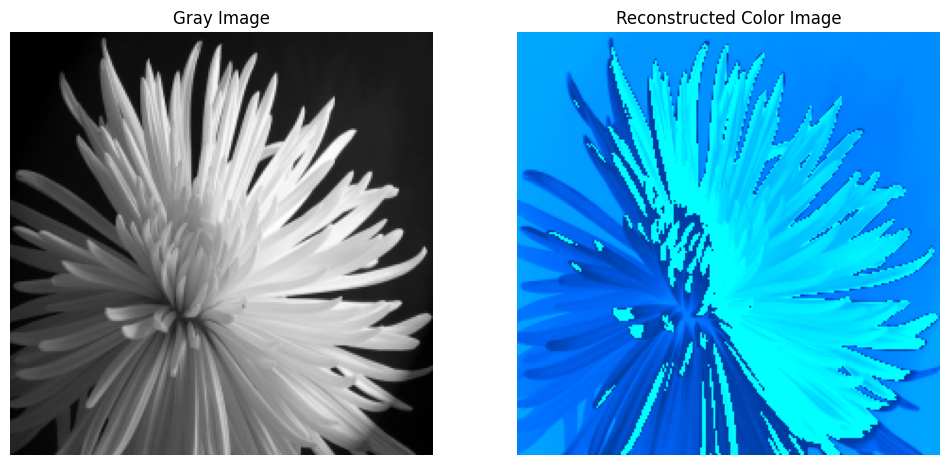

In [29]:
# 결과 이미지 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 흑백 이미지
axes[0].imshow(test_gray, cmap='gray')
axes[0].axis("off")
axes[0].set_title("Gray Image")

# 컬러 이미지
axes[1].imshow(cv2.cvtColor(predicted_rgb, cv2.COLOR_BGR2RGB))
axes[1].axis("off")
axes[1].set_title("Reconstructed Color Image")

plt.show()

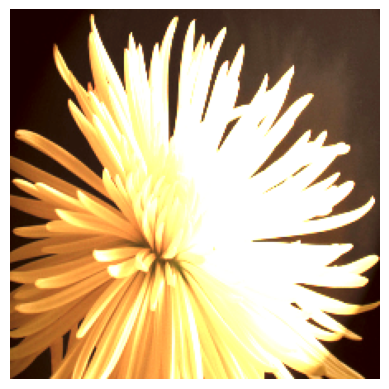

In [33]:
# L, AB 채널 데이터 (예시)
L = gray_scale[72]  # (224, 224), 흑백 밝기 정보
AB = ab1_normalized[72]  # (224, 224, 2), A와 B 채널

# Lab 배열 조합
Lab = np.zeros((L.shape[0], L.shape[1], 3))  # (224, 224, 3)
Lab[:, :, 0] = L  # L 채널
Lab[:, :, 1:] = AB  # A와 B 채널

# Lab → RGB 변환
rgb_image = lab2rgb(Lab)

# RGB 이미지 시각화
plt.imshow(rgb_image)
plt.axis("off")
plt.show()

In [35]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # 하이퍼파라미터 범위 정의
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(train_images, train_labels)
    score = -cross_val_score(model, train_images, train_labels, cv=3, scoring='neg_mean_squared_error').mean()
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params_)

[I 2024-11-28 12:03:03,862] A new study created in memory with name: no-name-8ddac62c-dddd-4134-bf27-02869c68f369


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 랜덤 서치 파라미터 범위 정의
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 0.5]
}

# 랜덤 서치 정의
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42)

# 랜덤 서치 실행
random_search.fit(train_images, train_images)

# 최적의 파라미터 출력
print("Best Parameters:", random_search.best_params_)
